In [2]:
import os
import sys
sys.path.append("..") # Adds higher directory to python modules path.

import cv2
from tqdm.auto import tqdm

from utils.reading import read_annotations_from_txt


In [3]:
repo_path = os.path.abspath('')
repo_path = os.path.abspath(os.path.join(os.getcwd(),"../.."))

dataset_path = os.path.join(repo_path, 'datasets', 'aic19-track1-mtmc-train')
train_path = os.path.join(dataset_path, 'train')
train_sequences = ['S01', 'S04']      # Train with S01 and S04
test_path = os.path.join(dataset_path, 'train', 'S03')
test_cameras = ['c010', 'c011', 'c012', 'c013', 'c014', 'c015']
#test_cameras = ['c010']

In [4]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [61]:
for sequence in train_sequences:
    print(sequence)
    sequence_path = os.path.join(train_path, sequence)
    cameras = [f for f in os.listdir(sequence_path) if not f.startswith('.')]

    for camera in cameras:
        print(camera)
        # Load video
        video_path = os.path.join(sequence_path, camera, 'vdo.avi')

        # Read groundtruth
        gt_path = os.path.join(sequence_path, camera, 'gt', 'gt.txt')
        groundtruth_list = read_annotations_from_txt(gt_path)

        # Load frames
        capture = cv2.VideoCapture(video_path)
        pbar = tqdm(total=int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
        while capture.isOpened():
            valid, frame = capture.read()
            if not valid:
                break

            # Load bboxes on this frame
            gt_on_frame = [x for x in groundtruth_list if x.frame == int(capture.get(cv2.CAP_PROP_POS_FRAMES))-1]

            for detection in gt_on_frame:            
                # Check and create track_id folder
                detection_path = os.path.join(repo_path, 'datasets', 'siamese_cars', str(detection.track_id))
                create_folder(detection_path)

                # Create crop
                crop_image = frame[detection.bbox[1]:detection.bbox[3], detection.bbox[0]:detection.bbox[2]]
                
                # TODO: resize
                resize_image = cv2.resize(crop_image,(64,64))
                
                # Save crop in folder
                cv2.imwrite(os.path.join(detection_path, "{}_{}_{:04d}-{:04d}.jpg".format(sequence, camera, detection.track_id, detection.frame)), resize_image)                
                #cv2.imshow("cropped", crop_img)
                #cv2.waitKey(0)

            pbar.update(1)
        pbar.close()


S01
c002


c005


c004


c003


c001


S04
c033


c034


c035


c032


c017


c028


c021


c026


c019


c027


c018


c020


c016


c029


c037


c030


c039


c038


c031


c036


c025


c022


c040


c023


c024


# Estudiar dataset

In [43]:
from glob import glob
import pandas as pd
import cv2
from PIL import Image


In [52]:
dataset_path = os.path.join(repo_path, 'datasets', 'siamese_cars')

clase_list = []
length_list = []
images_list = []
height_list = []
width_list = []

for clase in [f for f in os.listdir(dataset_path) if not f.startswith('.')]:
    print(clase)
    clase_list.append(clase)
    
    images_list = os.listdir(os.path.join(dataset_path, clase))
    length_list.append(len(images_list))


307
61
95
300
59
92
66
309
50
68
57
32
35
69
56
51
308
58
301
67
93
306
94
60
34
33
280
274
273
287
289
288
286
272
275
281
268
292
266
259
261
295
294
260
267
293
269
20
18
27
9
11
7
29
16
42
89
324
45
323
73
87
315
80
74
312
6
28
17
1
10
19
26
8
21
75
81
313
86
72
314
44
322
43
88
325
38
36
31
303
91
65
304
62
54
53
30
37
39
52
55
305
63
302
64
90
270
284
283
277
279
278
276
282
285
271
298
262
296
291
265
264
290
297
263
299
46
79
320
318
41
327
83
77
311
48
70
329
84
316
24
23
4
15
3
12
328
85
71
317
76
82
49
310
40
319
326
47
321
78
2
13
5
14
22
25


In [38]:
images_list

['S04_c038_0307-0270.jpg',
 'S04_c038_0307-0271.jpg',
 'S04_c036_0307-0349.jpg',
 'S04_c038_0307-0273.jpg',
 'S04_c038_0307-0272.jpg',
 'S04_c036_0307-0348.jpg',
 'S04_c036_0307-0358.jpg',
 'S04_c038_0307-0276.jpg',
 'S04_c038_0307-0277.jpg',
 'S04_c036_0307-0359.jpg',
 'S04_c038_0307-0275.jpg',
 'S04_c038_0307-0274.jpg',
 'S04_c036_0307-0329.jpg',
 'S04_c036_0307-0315.jpg',
 'S04_c036_0307-0314.jpg',
 'S04_c036_0307-0328.jpg',
 'S04_c036_0307-0316.jpg',
 'S04_c036_0307-0317.jpg',
 'S04_c036_0307-0313.jpg',
 'S04_c036_0307-0312.jpg',
 'S04_c036_0307-0338.jpg',
 'S04_c036_0307-0339.jpg',
 'S04_c036_0307-0311.jpg',
 'S04_c036_0307-0334.jpg',
 'S04_c036_0307-0320.jpg',
 'S04_c036_0307-0321.jpg',
 'S04_c036_0307-0335.jpg',
 'S04_c036_0307-0323.jpg',
 'S04_c036_0307-0337.jpg',
 'S04_c036_0307-0336.jpg',
 'S04_c036_0307-0322.jpg',
 'S04_c036_0307-0326.jpg',
 'S04_c036_0307-0332.jpg',
 'S04_c036_0307-0333.jpg',
 'S04_c036_0307-0327.jpg',
 'S04_c036_0307-0331.jpg',
 'S04_c036_0307-0325.jpg',
 

In [41]:
d = {'name': images_list, 'height': height_list, 'width': width_list}
df = pd.DataFrame(data=d)
df

ValueError: arrays must all be same length

In [55]:
d = {'Clase': clase_list, 'Samples': length_list}
df = pd.DataFrame(data=d)
df

,Clase,Samples
0,307,62
1,61,96
2,95,40
3,300,187
4,59,116
5,92,206
6,66,85
7,309,545
8,50,170
9,68,76


# Calibration

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

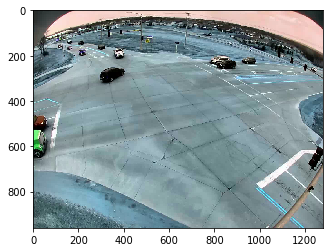

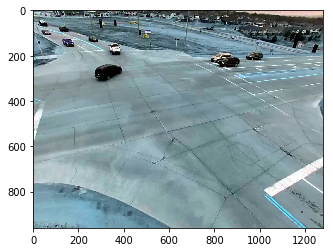

In [125]:
def get_undistort_matrices(calibration_path):
    # Load calibration 
    f = open(calibration_path, "r")

    # Not necessary
    f.readline()

    # Camera matrix
    line = f.readline()
    line_split = line.split()
    camera_matrix = np.array([[line_split[3], line_split[4], line_split[5].split(";")[0]],[line_split[5].split(";")[1], line_split[6], line_split[7].split(";")[0]],[line_split[7].split(";")[1], line_split[8], line_split[9]]], dtype=np.float64)
    #print(camera_matrix)

    # Distort coefficients
    line = f.readline()
    line_split = line.split()
    distort_coef = np.array([line_split[2], line_split[3], line_split[4], line_split[5]], dtype=np.float64)
    #print(distort_coef)

    f.close()
    
    return camera_matrix, distort_coef
    
calibration_video = os.path.join(train_path, 'S01', 'c005', 'vdo.avi')
calibration_path = "calibration.txt"

camera_matrix, distort_coef = get_undistort_matrices(calibration_path)

# Load one image
capture = cv2.VideoCapture(calibration_video)
while capture.isOpened():
    valid, frame = capture.read()
    if not valid:
        break
    break    
    
plt.imshow(frame)
plt.show()

dst = cv2.undistort(frame, camera_matrix, distort_coef, None, None)

plt.imshow(dst)
plt.show()


In [118]:
calibration_video = os.path.join(train_path, 'S01', 'c005', 'vdo.avi')
calibration_path = "calibration.txt"

# Load calibration 
f = open(calibration_path, "r")

# Not necessary
f.readline()

# Camera matrix
line = f.readline()
line_split = line.split()
camera_matrix = np.array([[line_split[3], line_split[4], line_split[5].split(";")[0]],[line_split[5].split(";")[1], line_split[6], line_split[7].split(";")[0]],[line_split[7].split(";")[1], line_split[8], line_split[9]]], dtype=np.float64)
print(camera_matrix)

# Distort coefficients
line = f.readline()
line_split = line.split()
distort_coef = np.array([line_split[2], line_split[3], line_split[4], line_split[5]], dtype=np.float64)
print(distort_coef)

f.close()

[[1.28e+03 0.00e+00 6.40e+02]
 [0.00e+00 1.28e+03 4.80e+02]
 [0.00e+00 0.00e+00 1.00e+00]]
[-0.60000002  0.          0.          0.        ]


In [119]:
# Load one image
capture = cv2.VideoCapture(calibration_video)
while capture.isOpened():
    valid, frame = capture.read()
    if not valid:
        break
    break    
    

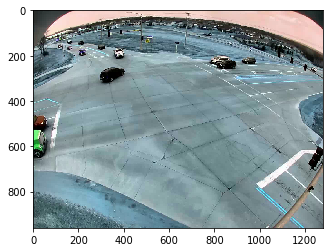

In [120]:
plt.imshow(frame)
plt.show()

In [121]:
dst = cv2.undistort(frame, camera_matrix, distort_coef, None, None)

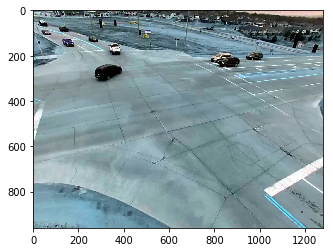

In [123]:
plt.imshow(dst)
plt.show()